<a href="https://colab.research.google.com/github/Chiragslnk/chirag/blob/main/titanicdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
titanic_dataset = pd.read_csv('/content/sample_data/tested.csv')

In [ ]:
titanic_dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic_dataset.shape

(418, 12)

In [ ]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#drop cabine values
titanic_dataset.drop(columns=['Cabin'],inplace=True)

In [ ]:
#importing messing value for age
#Strategy-mean
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean,inplace=True)

In [ ]:
#importing messing value for embarked
#finding the most appeared value in embarked column
titanic_dataset['Embarked'].value_counts()
#S it is
titanic_dataset['Embarked'].fillna('S', inplace=True)

In [ ]:
# Want to check one more thing...

# Should I change the SibSp and Parch to categories

titanic_dataset['SibSp'].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [ ]:
titanic_dataset['Parch'].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

Changing data type for the following cols
Survived(category),
PClass(category),
Sex(category),
Age(int),
Embarked(category)

In [ ]:
titanic_dataset['Survived']=titanic_dataset['Survived'].astype('category')
titanic_dataset['Pclass']=titanic_dataset['Pclass'].astype('category')
titanic_dataset['Sex']=titanic_dataset['Sex'].astype('category')
titanic_dataset['Age']=titanic_dataset['Age'].astype('float')
titanic_dataset['Embarked']=titanic_dataset['Embarked'].astype('category')

In [ ]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    category
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          332 non-null    float64 
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         417 non-null    float64 
 10  Cabin        91 non-null     object  
 11  Embarked     418 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 28.4+ KB


In [ ]:
# Five point summary
titanic_dataset.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,30.272590,0.447368,0.392344,35.627188
std,120.810458,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['SibSp'].plot(kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Parch'].plot(kind='hist', bins=20, title='Parch')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PassengerId', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SibSp', y='Parch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Parch', y='Fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['SibSp'].plot(kind='line', figsize=(8, 4), title='SibSp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Parch'].plot(kind='line', figsize=(8, 4), title='Parch')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='PassengerId', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='SibSp', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Parch', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Out of 891 30 people died in the accident


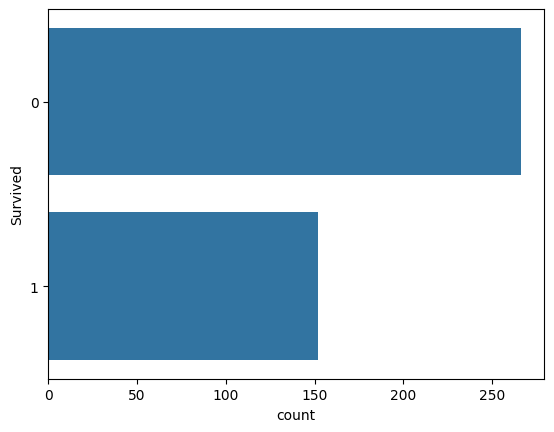

In [ ]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(titanic_dataset['Survived'])

death_percent=round((titanic_dataset['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

Pclass
3    24.466891
1    12.008979
2    10.437710
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Pclass'>

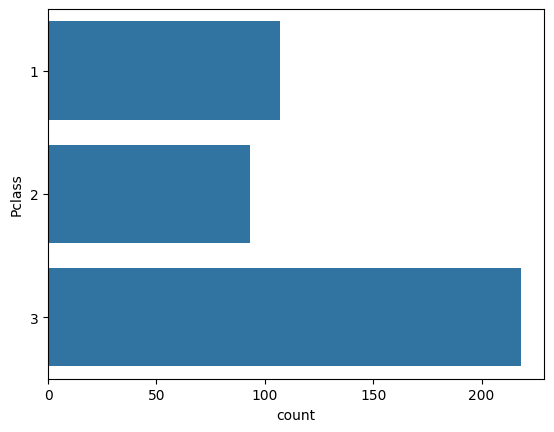

In [ ]:
# Pclass column

print((titanic_dataset['Pclass'].value_counts()/891)*100)

sns.countplot(titanic_dataset['Pclass'])

# Conclusion : Pclass was the most crowded class

Sex
male      29.854097
female    17.059484
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Sex'>

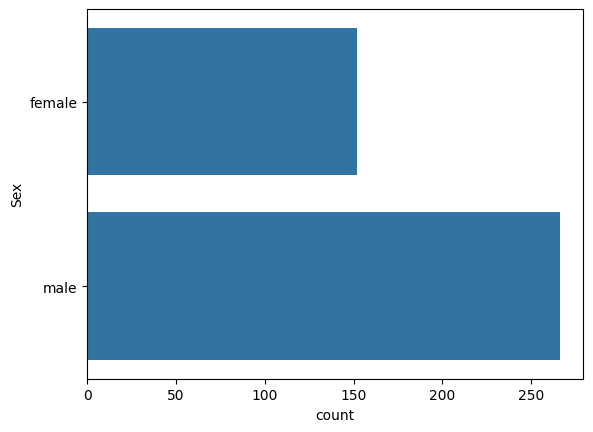

In [ ]:
print((titanic_dataset['Sex'].value_counts()/891)*100)

sns.countplot(titanic_dataset['Sex'])

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64


<Axes: ylabel='count'>

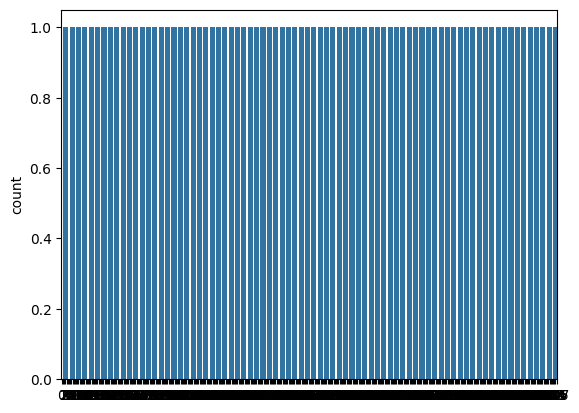

In [ ]:
print(titanic_dataset['SibSp'].value_counts())

sns.countplot(titanic_dataset['SibSp'])

Parch
0    36.363636
1     5.836139
2     3.703704
3     0.336700
4     0.224467
9     0.224467
6     0.112233
5     0.112233
Name: count, dtype: float64


<Axes: ylabel='count'>

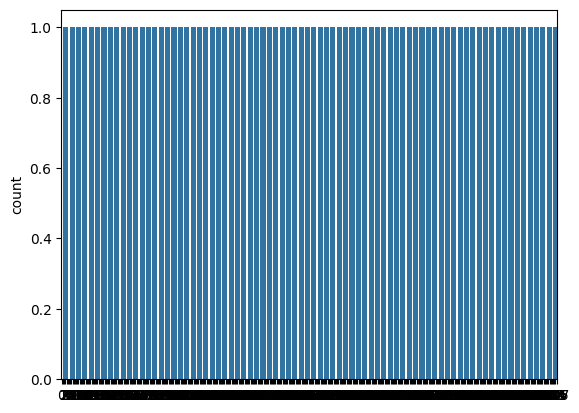

In [ ]:
print((titanic_dataset['Parch'].value_counts()/891)*100)

sns.countplot(titanic_dataset['Parch'])

Embarked
S    30.303030
C    11.447811
Q     5.162738
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Embarked'>

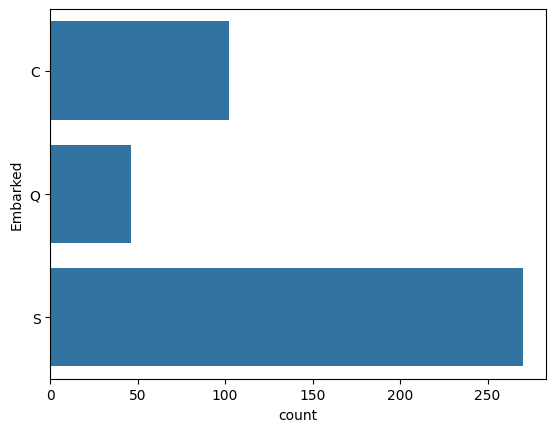

In [ ]:
print((titanic_dataset['Embarked'].value_counts()/891)*100)

sns.countplot(titanic_dataset['Embarked'])

<ipython-input-33-3cc24e0236c6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_dataset['Age'])


0.4573612871503845
0.08378335153796135


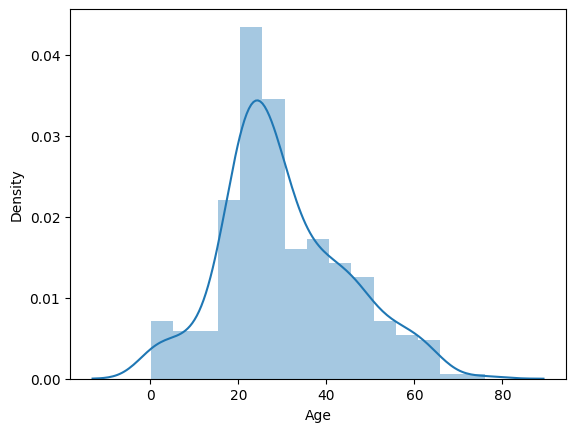

In [ ]:
# Age column

sns.distplot(titanic_dataset['Age'])

print(titanic_dataset['Age'].skew())

print(titanic_dataset['Age'].kurt())

<Axes: ylabel='Age'>

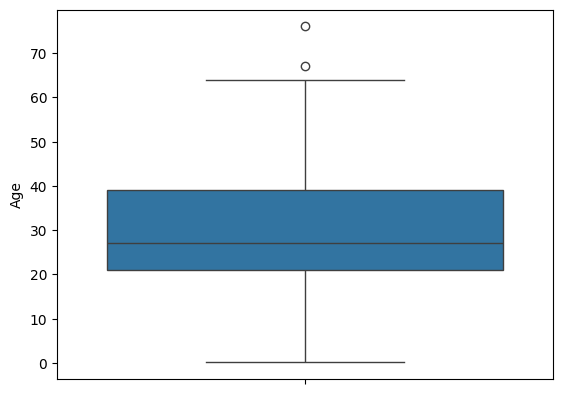

In [ ]:
sns.boxplot(titanic_dataset['Age'])

In [ ]:
# Just out of curiosity

print("People with age in between 60 and 70 are",titanic_dataset[(titanic_dataset['Age']>60) & (titanic_dataset['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",titanic_dataset[(titanic_dataset['Age']>=70) & (titanic_dataset['Age']<=75)].shape[0])
print("People with age greater than 75 are",titanic_dataset[titanic_dataset['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",titanic_dataset[titanic_dataset['Age']<1].shape[0])

People with age in between 60 and 70 are 10
People with age greater than 70 and 75 are 0
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 5


Conclusion :-
1--For all practical purposes age can be cosidered as normal distribution.  
2--Deeper analysis is required for outlier detection

<ipython-input-36-7b22938fdd21>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_dataset['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

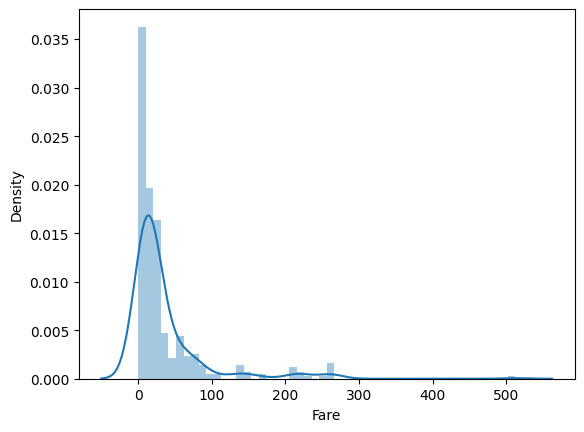

In [ ]:
# Fare column

sns.distplot(titanic_dataset['Fare'])

In [ ]:
print(titanic_dataset['Fare'].skew())
print(titanic_dataset['Fare'].kurt())

3.6872133081121405
17.92159525773599


<Axes: ylabel='Fare'>

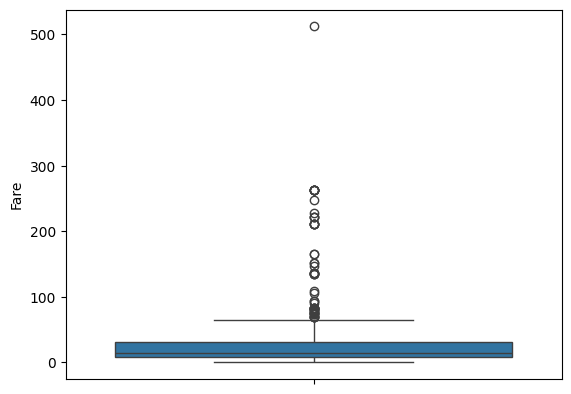

In [ ]:
sns.boxplot(titanic_dataset['Fare'])

In [ ]:
print("People with fare in between $200 and $300",titanic_dataset[(titanic_dataset['Fare']>200) & (titanic_dataset['Fare']<300)].shape[0])
print("People with fare in greater than $300",titanic_dataset[titanic_dataset['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 1


Conclusion :-
1: Highly skewed data, a lot of people had cheaper tickets
2: Outliers are there in the data

In [7]:


pd.crosstab(titanic_dataset['Pclass'], titanic_dataset['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Pclass,,
1,53.3,46.7
2,67.7,32.3
3,67.0,33.0


In [11]:
# Survival with Embarked

pd.crosstab(titanic_dataset['Embarked'], titanic_dataset['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,60.8,39.2
Q,47.8,52.2
S,67.4,32.6


<ipython-input-12-abb7297f6424>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_dataset[titanic_dataset['Survived']==0]['Age'])
<ipython-input-12-abb7297f6424>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_dataset[titanic_dataset['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

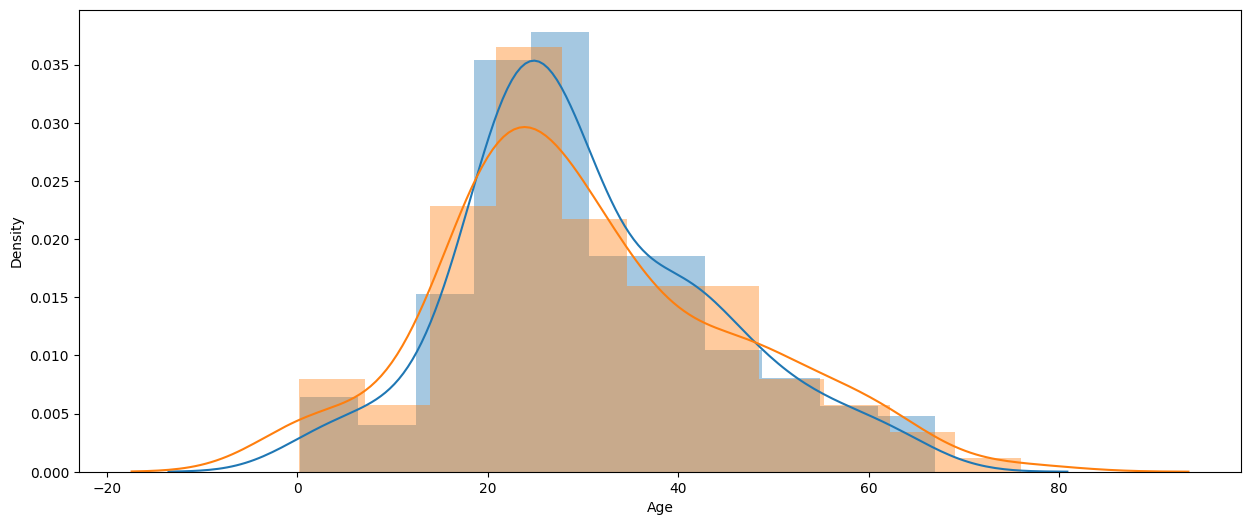

In [12]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(titanic_dataset[titanic_dataset['Survived']==0]['Age'])
sns.distplot(titanic_dataset[titanic_dataset['Survived']==1]['Age'])

<ipython-input-13-40183c697412>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_dataset[titanic_dataset['Survived']==0]['Fare'])
<ipython-input-13-40183c697412>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_dataset[titanic_dataset['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

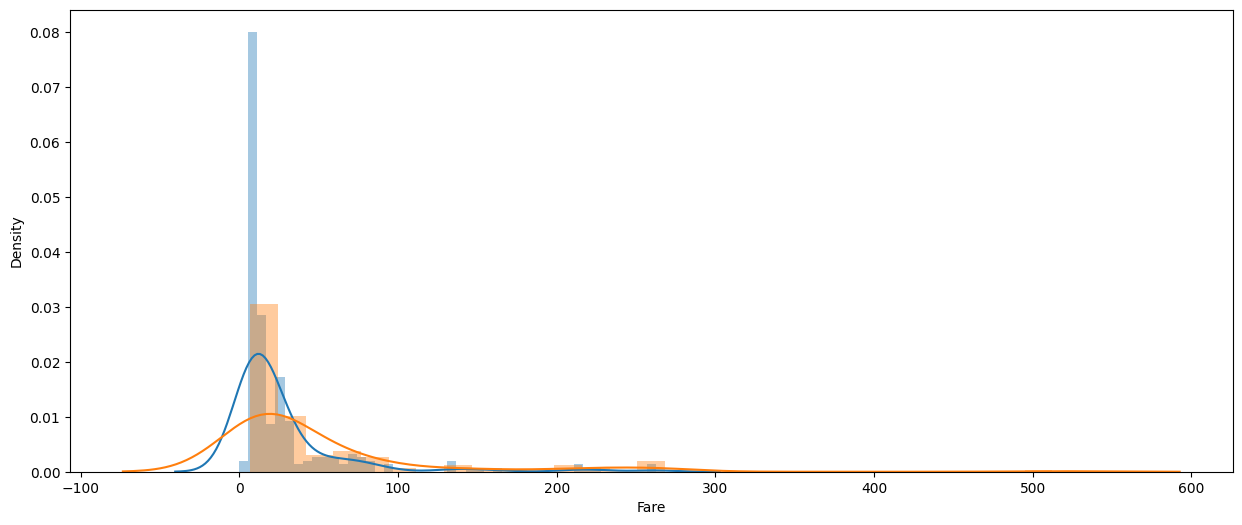

In [13]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(titanic_dataset[titanic_dataset['Survived']==0]['Fare'])
sns.distplot(titanic_dataset[titanic_dataset['Survived']==1]['Fare'])

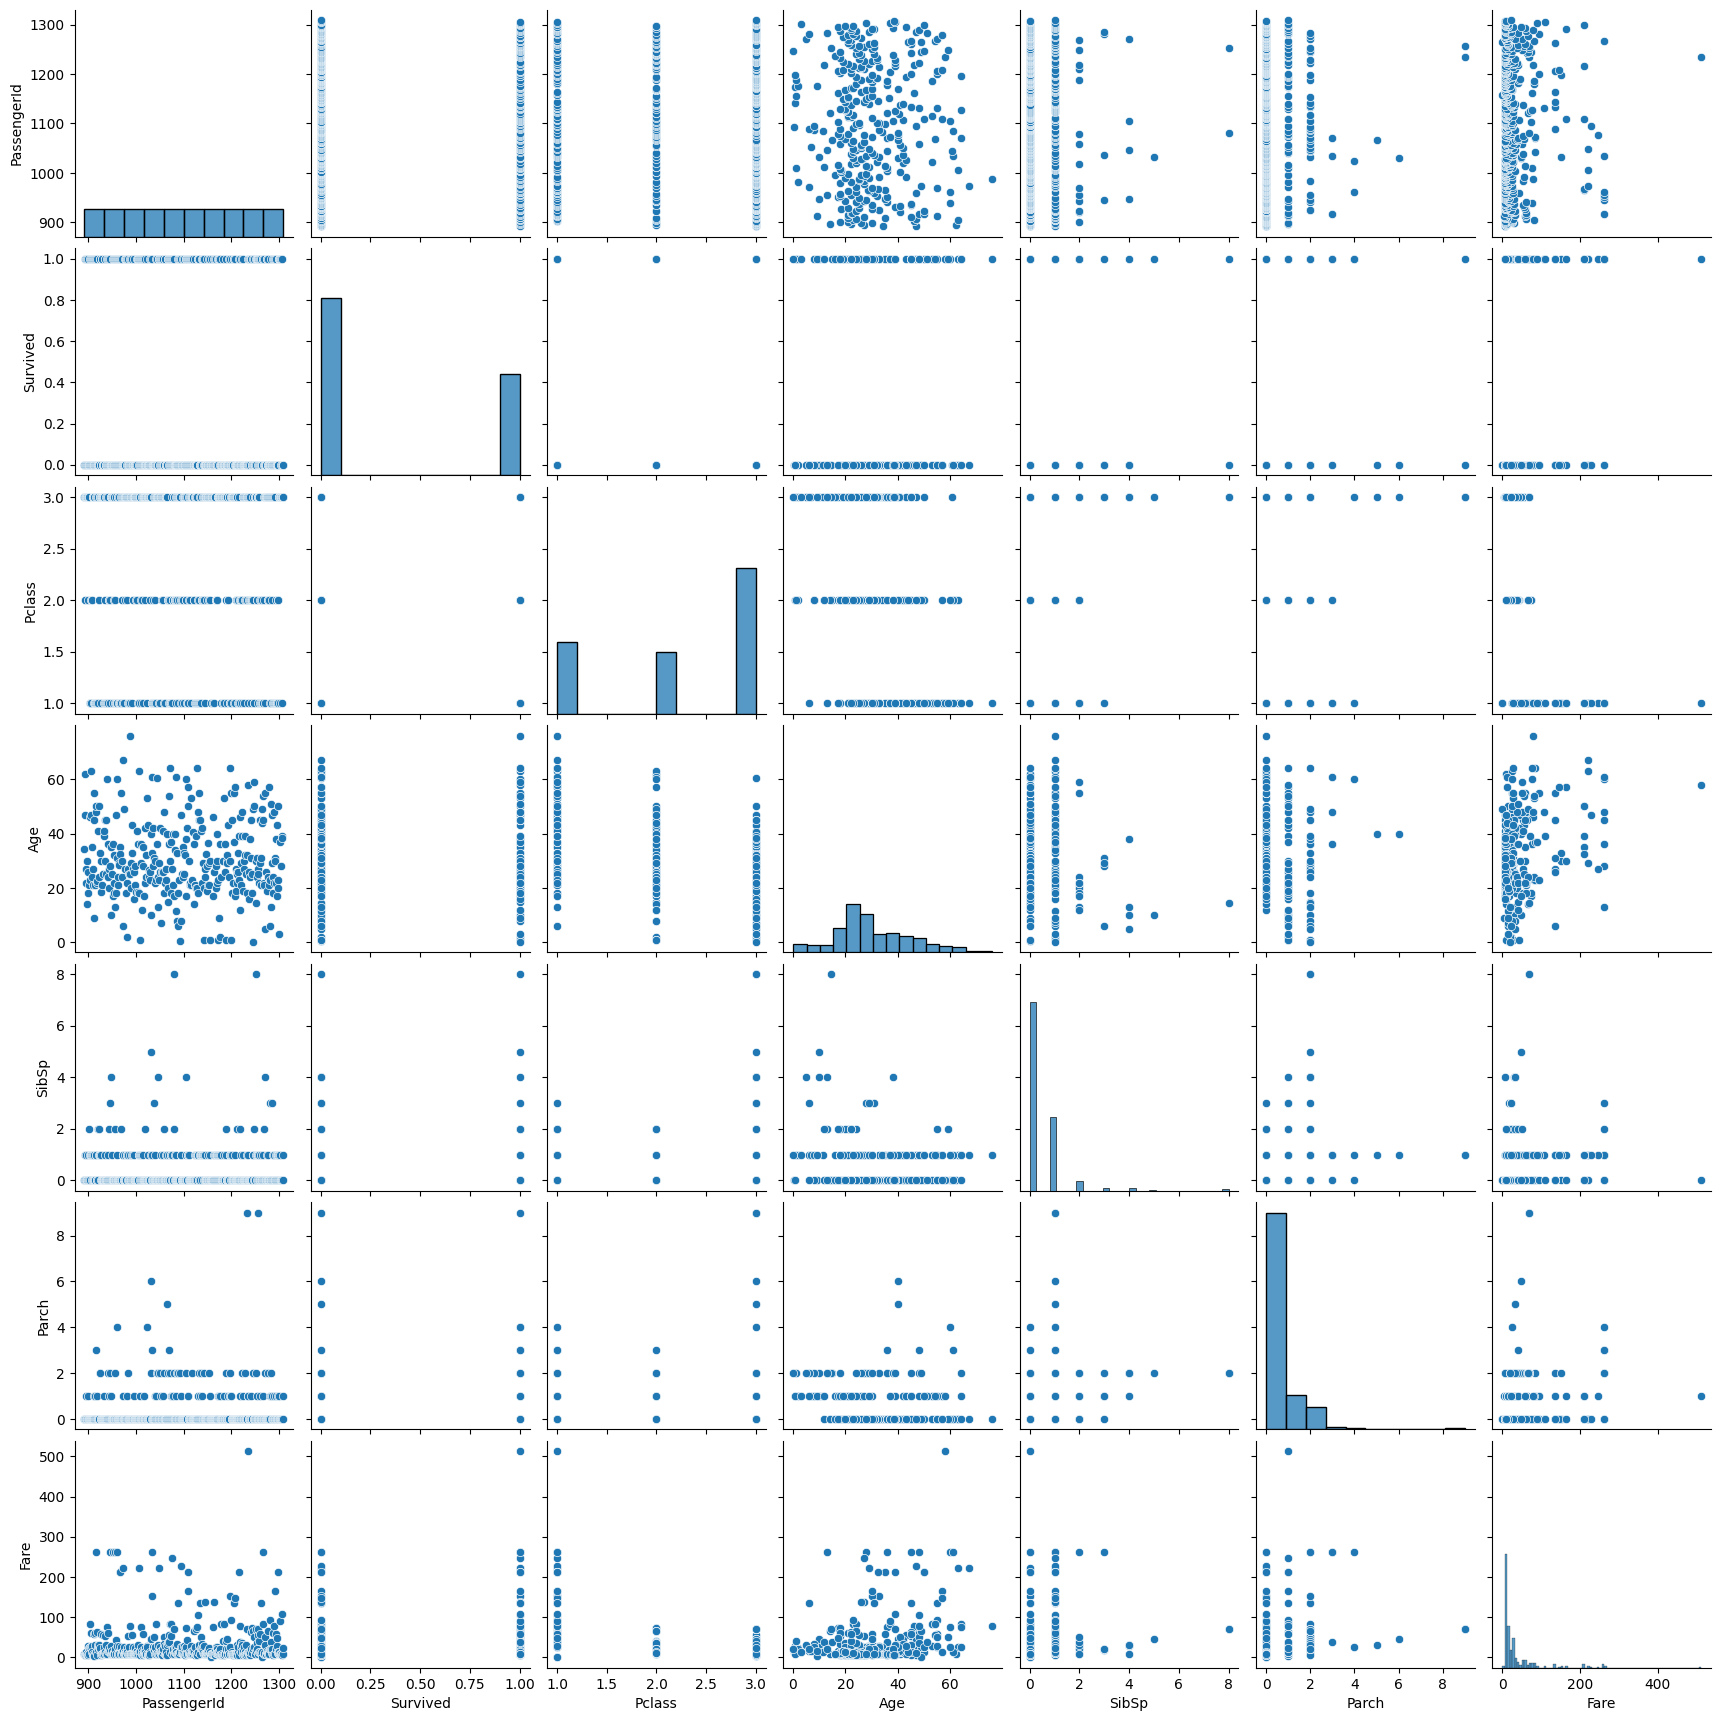

In [14]:
sns.pairplot(titanic_dataset)

In [16]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

titanic_dataset['family_size']=titanic_dataset['Parch'] + titanic_dataset['SibSp']

In [17]:
titanic_dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
326,1218,1,2,"Becker, Miss. Ruth Elizabeth",female,12.0,2,1,230136,39.0000,F4,S,3
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,10
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
61,953,0,2,"McCrae, Mr. Arthur Gordon",male,32.0,0,0,237216,13.5000,NaN,S,0
112,1004,1,1,"Evans, Miss. Edith Corse",female,36.0,0,0,PC 17531,31.6792,A29,C,0


In [18]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [19]:
titanic_dataset['family_type']=titanic_dataset['family_size'].apply(family_type)

In [20]:
titanic_dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type
308,1200,0,1,"Hays, Mr. Charles Melville",male,55.0,1,1,12749,93.500,B69,S,2,Medium
319,1211,0,2,"Jefferys, Mr. Ernest Wilfred",male,22.0,2,0,C.A. 31029,31.500,NaN,S,2,Medium
143,1035,0,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,244358,26.000,NaN,S,0,Alone
398,1290,0,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.775,NaN,S,0,Alone
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.150,NaN,S,2,Medium


In [21]:
# Dropping SibSp, Parch and family_size

titanic_dataset.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [22]:
titanic_dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_type
18,910,1,3,"Ilmakangas, Miss. Ida Livija",female,27.00,STON/O2. 3101270,7.9250,NaN,S,Medium
112,1004,1,1,"Evans, Miss. Edith Corse",female,36.00,PC 17531,31.6792,A29,C,Alone
281,1173,0,3,"Peacock, Master. Alfred Edward",male,0.75,SOTON/O.Q. 3101315,13.7750,NaN,S,Medium
407,1299,0,1,"Widener, Mr. George Dunton",male,50.00,113503,211.5000,C80,C,Medium
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.00,113509,61.9792,B36,C,Medium


In [23]:
pd.crosstab(titanic_dataset['family_type'], titanic_dataset['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,73.1,26.9
Large,53.8,46.2
Medium,48.7,51.3


In [24]:
# handling outliers in age(Almost normal)

titanic_dataset=titanic_dataset[titanic_dataset['Age']<(titanic_dataset['Age'].mean() + 3 * titanic_dataset['Age'].std())]
titanic_dataset.shape

(331, 11)

In [25]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(titanic_dataset['Fare'],25)
Q3= np.percentile(titanic_dataset['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

titanic_dataset=titanic_dataset[(titanic_dataset['Fare']>outlier_low) & (titanic_dataset['Fare']<outlier_high)]

In [30]:


# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=titanic_dataset, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

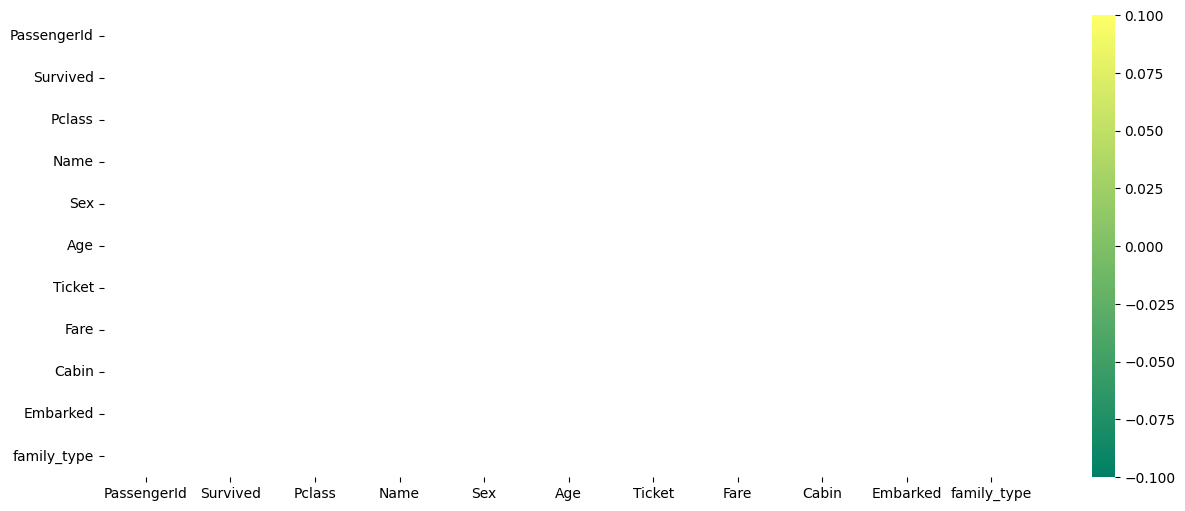

In [31]:
plt.figure(figsize=(15,6))
sns.heatmap(titanic_dataset.corr(), cmap='summer')